## <span style="color:lightblue">Car mpg</span>

<span style="color:lightblue">Consider car performance data from the file Auto.csv.</span>



<span style="color:lightblue">1) Read the data into pandas dataframe</span>


In [1]:
import pandas as pd

df = pd.read_csv('Auto.csv', delimiter=',')
df.info(); df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0



<span style="color:lightblue">2) Setup multiple regression X and y to predict 'mpg' of cars using all the variables except 'mpg', 'name' and 'origin'</span>


In [2]:
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df[['mpg']]
X

,cylinders,displacement,horsepower,weight,acceleration,year
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82
388,4,97.0,52,2130,24.6,82
389,4,135.0,84,2295,11.6,82
390,4,120.0,79,2625,18.6,82



<span style="color:lightblue">3) Split data into training and testing sets (80/20 split)</span>


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


<span style="color:lightblue">4) Implement both ridge regression and LASSO regression using several values for alpha</span>


<span style="color:lightblue">5) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data</span>


In [4]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]
lasso_scores = []
for alp in alphas:
  lasso = Lasso(alpha=alp)
  lasso.fit(X_train, y_train)
  # print(lasso.coef_.round(2),lasso.intercept_)
  lsc = lasso.score(X_test, y_test)
  lasso_scores.append(lsc)
  # print("alpha=",alp," lasso score:", lsc)



<span style="color:lightblue">6) Plot the R2 scores for both regressors as functions of alpha</span>


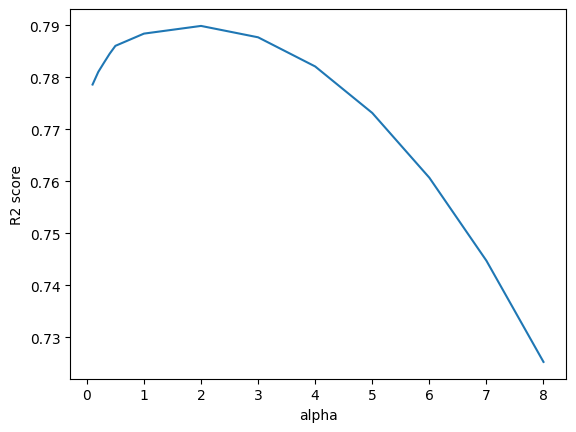

In [5]:
plt.plot(alphas, lasso_scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()


<span style="color:lightblue">7) Identify, as accurately as you can, the value for alpha which gives the best score</span>


In [6]:
best_r2 = max(lasso_scores)
idx = lasso_scores.index(best_r2)
best_alp = alphas[idx]

print(f"\nBest R2 = {best_r2}, Best alpha = {best_alp}")


Best R2 = 0.7898622361369412, Best alpha = 2
